<a href="https://colab.research.google.com/github/sundeepmuddana/DEVCODEEDUR/blob/master/sundeepdhamodhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

locations = ['79936', '10001', '30301', '60601', '90001']
departments = ['Electronics', 'Appliances']
categories = {
    'Electronics': ['Mobile Phones', 'Laptops', 'Tablets'],
    'Appliances': ['Refrigerators', 'Washing Machines', 'Microwaves']
}
products = {
    'Mobile Phones': [
        {'name': 'iPhone 14', 'brand': 'Apple', 'size': '128 GB', 'price': 25000.99},
        {'name': 'Galaxy S23', 'brand': 'Samsung', 'size': '128 GB', 'price': 40000.99},
        {'name': 'Pixel 7', 'brand': 'Google', 'size': '128 GB', 'price': 35000.99}
    ],
    'Laptops': [
        {'name': 'MacBook Air', 'brand': 'Apple', 'size': '256 GB', 'price': 70000.99},
        {'name': 'XPS 13', 'brand': 'Dell', 'size': '256 GB', 'price': 80000.99},
        {'name': 'ThinkPad X1', 'brand': 'Lenovo', 'size': '512 GB', 'price': 90000.99}
    ],
    'Tablets': [
        {'name': 'iPad Pro', 'brand': 'Apple', 'size': '128 GB', 'price': 45000.99},
        {'name': 'Galaxy Tab S8', 'brand': 'Samsung', 'size': '128 GB', 'price': 35000.99},
        {'name': 'Surface Pro 9', 'brand': 'Microsoft', 'size': '256 GB', 'price': 32000.99}
    ],
    'Refrigerators': [
        {'name': 'French Door Refrigerator', 'brand': 'LG', 'size': '25 Cu. Ft.', 'price': 75000.99},
        {'name': 'Side-by-Side Refrigerator', 'brand': 'Samsung', 'size': '28 Cu. Ft.', 'price': 85000.99},
        {'name': 'Top Freezer Refrigerator', 'brand': 'Whirlpool', 'size': '20 Cu. Ft.', 'price': 65000.99}
    ],
    'Washing Machines': [
        {'name': 'Front Load Washer', 'brand': 'LG', 'size': '4.5 Cu. Ft.', 'price': 25000.99},
        {'name': 'Top Load Washer', 'brand': 'Samsung', 'size': '5.0 Cu. Ft.', 'price': 15000.99},
        {'name': 'Portable Washer', 'brand': 'GE', 'size': '2.8 Cu. Ft.', 'price': 10000.99}
    ],
    'Microwaves': [
        {'name': 'Over-the-Range Microwave', 'brand': 'GE', 'size': '1.7 Cu. Ft.', 'price': 12000.99},
        {'name': 'Countertop Microwave', 'brand': 'Panasonic', 'size': '1.2 Cu. Ft.', 'price': 13000.99},
        {'name': 'Built-in Microwave', 'brand': 'Bosch', 'size': '1.6 Cu. Ft.', 'price': 18000.99}
    ]
}

num_rows = 10000

single_sale_event = 'Festive Offer'
demand_levels = ['High', 'Low']
inventory_levels = ['High', 'Medium', 'Low']
competitor_pricing_levels = ['High', 'Low']

# Updated time slots
time_of_day = [
    '6AM-7AM', '7AM-8AM', '8AM-9AM', '9AM-10AM',
    '10AM-11AM', '11AM-12PM', '12PM-1PM', '1PM-2PM',
    '2PM-3PM', '3PM-4PM', '4PM-5PM', '5PM-6PM',
    '6PM-7PM', '7PM-8PM'
]

# Days of the week
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

rows = []
for i in range(num_rows):
    location = random.choice(locations)
    department = random.choice(departments)
    category = random.choice(categories[department])

    if category not in products:
        print(f"Category '{category}' not found in products dictionary.")
        continue

    product = random.choice(products[category])
    run_date = datetime(2022, 1, 1) + timedelta(days=random.randint(0, 365))
    day_of_week = run_date.strftime('%A')

    row = {
        'SHIPPING_LOCATION': location,
        'DEPARTMENT': department,
        'CATEGORY': category,
        'SUBCATEGORY': np.nan,
        'C/S': f'{department}/{category}',
        'SKU': random.randint(100000000, 999999999),
        'PRODUCT_URL': f'https://www.walmart.com/ip/{product["name"].replace(" ", "-")}',
        'PRODUCT_NAME': f'{product["brand"]} {product["name"]}, {product["size"]}',
        'BRAND': product['brand'],
        'PRICE_RETAIL': product['price'],
        'PRICE_CURRENT': product['price'],
        'PRODUCT_SIZE': product['size'].split(' ')[0],
        'PROMOTION': np.nan,
        'RunDate': run_date.strftime('%Y-%m-%d %H:%M:%S'),
        'DAY_OF_WEEK': day_of_week,
        'SALE_EVENT': single_sale_event,
        'DEMAND': random.choice(demand_levels),
        'INVENTORY_LEVEL': random.choice(inventory_levels),
        'COMPETITOR_PRICING': random.choice(competitor_pricing_levels),
        'TIME_OF_DAY': random.choice(time_of_day)
    }
    rows.append(row)

df = pd.DataFrame(rows)

df['RunDate'] = pd.to_datetime(df['RunDate'])

df.to_csv('retail_large_sample_data_with_features.csv', index=False)

print("Large sample CSV file with retail products and additional features created successfully.")


Large sample CSV file with retail products and additional features created successfully.


In [11]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/content/retail_large_sample_data_with_features.csv')

# Extract month and day of the week
df['Month'] = pd.to_datetime(df['RunDate']).dt.month
df['DayOfWeek'] = pd.to_datetime(df['RunDate']).dt.day_name()

# Fill NaN values in the 'PROMOTION' column
df.fillna({'PROMOTION': 'None'}, inplace=True)

# Add indicators for mobile phones only
df['IsMobilePhone'] = (df['CATEGORY'] == 'Mobile Phones').astype(int)

# Update promotion based on time of day, day of the week, and additional features
def update_promotion(row):
    if row['IsMobilePhone']:
        if row['DEMAND'] == 'High':
            if row['INVENTORY_LEVEL'] == 'Low':
                return 'High Demand, Low Inventory Discount'
            elif row['COMPETITOR_PRICING'] == 'High':
                return 'High Demand, High Competitor Pricing Discount'

        if 'PM' in row['TIME_OF_DAY'] and row['COMPETITOR_PRICING'] == 'Low':
            if row['DayOfWeek'] in ['Friday', 'Saturday']:
                return 'Weekend Evening Special Discount'
            else:
                return 'Evening Special Discount'

    return 'Regular'

df['PROMOTION'] = df.apply(update_promotion, axis=1)

# Calculate price change and days since last price update
df['Price_Change'] = df.groupby('SKU')['PRICE_CURRENT'].pct_change().fillna(0)
df['Days_Since_Last_Price_Update'] = (pd.to_datetime(df['RunDate']) - pd.to_datetime(df.groupby('SKU')['RunDate'].shift(1))).dt.days.fillna(0)

# Save the updated data to a new CSV file
df.to_csv('updated_walmart_data_with_full_features_promotions.csv', index=False)

print("Data preprocessing with additional features completed successfully.")


Data preprocessing with additional features completed successfully.


In [7]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [8]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load your data
df = pd.read_csv('updated_walmart_data_with_full_features_promotions.csv')

# Feature engineering
df['Price_Retail_Log'] = np.log1p(df['PRICE_RETAIL'])
df['Price_Current_Log'] = np.log1p(df['PRICE_CURRENT'])
df['Product_Length'] = df['PRODUCT_NAME'].apply(lambda x: len(x))
df['IsHighPrice'] = (df['PRICE_RETAIL'] > df['PRICE_RETAIL'].median()).astype(int)

# Adding DayOfWeek
df['DayOfWeek'] = pd.to_datetime(df['RunDate']).dt.dayofweek  # Monday=0, Sunday=6

# Adding random noise to PRICE_CURRENT to simulate variability
np.random.seed(42)
noise = np.random.normal(0, 0.1 * df['PRICE_CURRENT'].mean(), df.shape[0])
df['PRICE_CURRENT'] = df['PRICE_CURRENT'] - noise

# Ensure PRICE_CURRENT is always less than PRICE_RETAIL
df['PRICE_CURRENT'] = np.where(df['PRICE_CURRENT'] >= df['PRICE_RETAIL'], df['PRICE_RETAIL'] - 0.01, df['PRICE_CURRENT'])

# Label encoding for categorical features
label_encoder = LabelEncoder()
df['DEMAND'] = label_encoder.fit_transform(df['DEMAND'])
df['INVENTORY_LEVEL'] = label_encoder.fit_transform(df['INVENTORY_LEVEL'])
df['COMPETITOR_PRICING'] = label_encoder.fit_transform(df['COMPETITOR_PRICING'])
df['TIME_OF_DAY'] = label_encoder.fit_transform(df['TIME_OF_DAY'])
df['SALE_EVENT'] = label_encoder.fit_transform(df['SALE_EVENT'])
df['IsMobilePhone'] = label_encoder.fit_transform(df['IsMobilePhone'])

# Define features and target variable
features = ['PRICE_RETAIL', 'Days_Since_Last_Price_Update',
            'Price_Retail_Log', 'Price_Current_Log', 'Product_Length',
            'IsHighPrice', 'DEMAND', 'INVENTORY_LEVEL', 'COMPETITOR_PRICING',
            'TIME_OF_DAY', 'SALE_EVENT', 'IsMobilePhone', 'DayOfWeek']

X = df[features]
y = df['PRICE_CURRENT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Increased n_estimators for better performance
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_ab_percentage_error = mean_absolute_percentage_error(y_test, y_pred)

print(f"Random Forest Regressor - Mean Squared Error: {mse:.4f}")
print(f"Random Forest Regressor - R^2 Score: {r2:.4f}")
print(f"Random Forest Regressor - Mean Absolute Percentage Error: {mean_ab_percentage_error * 100:.2f}%")

# Save the model as a pickle file
with open('random_forest_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Random Forest model saved successfully.")


Random Forest Regressor - Mean Squared Error: 8104456.3181
Random Forest Regressor - R^2 Score: 0.9886
Random Forest Regressor - Mean Absolute Percentage Error: 14.08%
Random Forest model saved successfully.


In [9]:
df.dtypes


,0
SHIPPING_LOCATION,int64
DEPARTMENT,object
CATEGORY,object
SUBCATEGORY,float64
C/S,object
SKU,int64
PRODUCT_URL,object
PRODUCT_NAME,object
BRAND,object
PRICE_RETAIL,float64


<ipython-input-21-35ccf4121945>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_phones_df['PROFITABILITY_HISTORICAL'] = mobile_phones_df['PRICE_RETAIL']
<ipython-input-21-35ccf4121945>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_phones_df['PROFITABILITY_DYNAMIC'] = mobile_phones_df['PRICE_CURRENT']


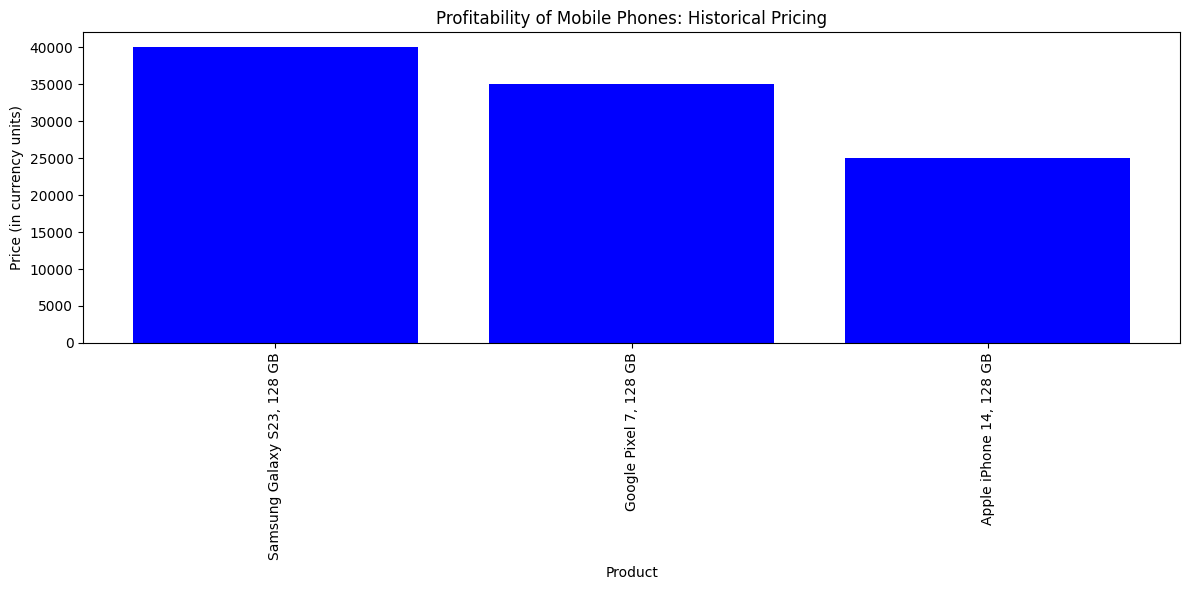

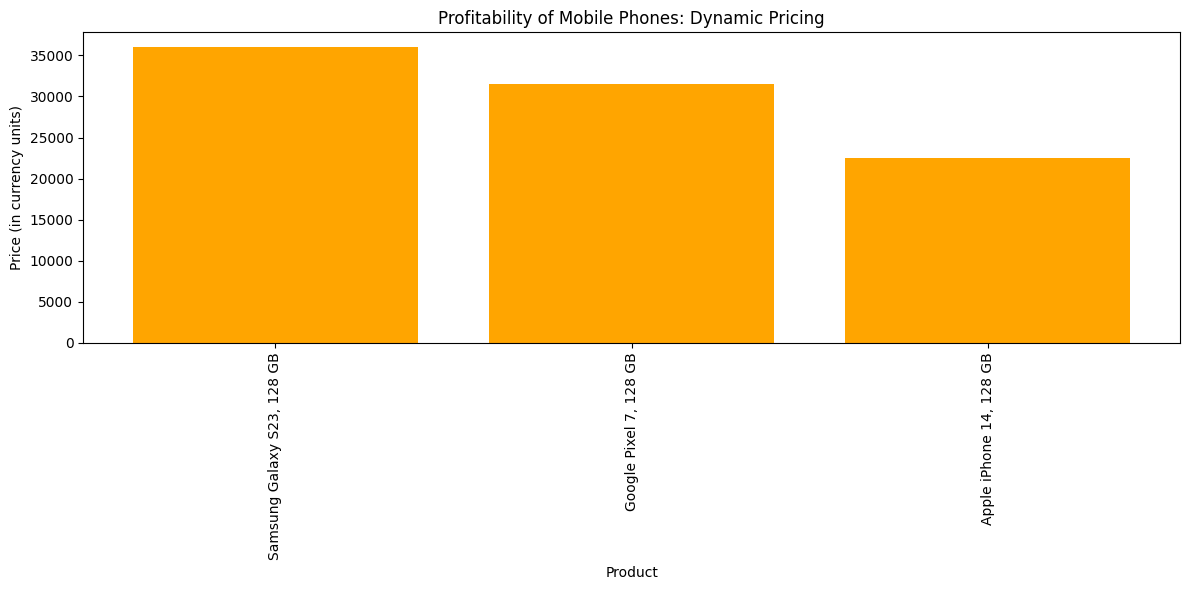

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the generated CSV file
df = pd.read_csv('retail_large_sample_data_with_features.csv')

# Convert 'RunDate' to datetime
df['RunDate'] = pd.to_datetime(df['RunDate'])

# Apply a 10% discount during the SALE_EVENT
df.loc[df['SALE_EVENT'] == 'Festive Offer', 'PRICE_CURRENT'] *= 0.9

# Apply an additional 10% discount on Saturdays
df.loc[df['DAY_OF_WEEK'] == 'Saturday', 'PRICE_CURRENT'] *= 0.9

# Filter data for the 'Mobile Phones' category
mobile_phones_df = df[df['CATEGORY'] == 'Mobile Phones']

# Calculate profitability as the difference between PRICE_RETAIL and PRICE_CURRENT
mobile_phones_df['PROFITABILITY_HISTORICAL'] = mobile_phones_df['PRICE_RETAIL']
mobile_phones_df['PROFITABILITY_DYNAMIC'] = mobile_phones_df['PRICE_CURRENT']

# Plotting Profitability Comparison: Historical Pricing
plt.figure(figsize=(12, 6))
plt.bar(mobile_phones_df['PRODUCT_NAME'], mobile_phones_df['PROFITABILITY_HISTORICAL'], color='blue', alpha=0.6)
plt.title('Profitability of Mobile Phones: Historical Pricing')
plt.xlabel('Product')
plt.ylabel('Price (in currency units)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting Profitability Comparison: Dynamic Pricing
plt.figure(figsize=(12, 6))
plt.bar(mobile_phones_df['PRODUCT_NAME'], mobile_phones_df['PROFITABILITY_DYNAMIC'], color='orange', alpha=0.6)
plt.title('Profitability of Mobile Phones: Dynamic Pricing')
plt.xlabel('Product')
plt.ylabel('Price (in currency units)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

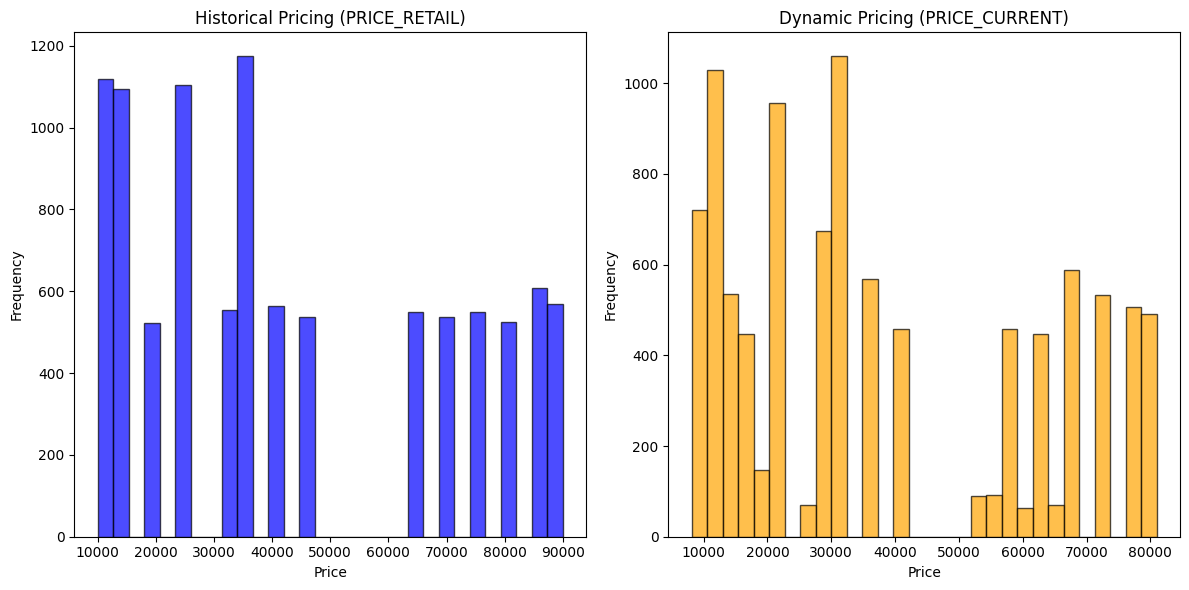

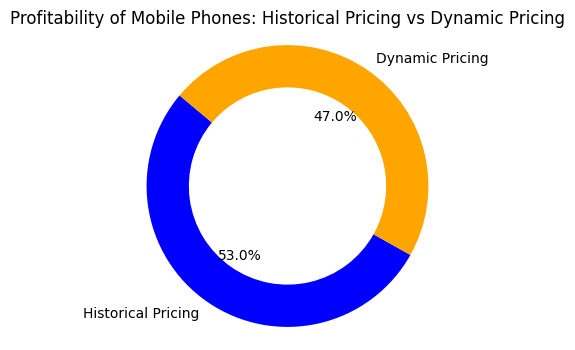

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the generated CSV file
df = pd.read_csv('retail_large_sample_data_with_features.csv')

# Convert 'RunDate' to datetime
df['RunDate'] = pd.to_datetime(df['RunDate'])

# Apply a 10% discount during the SALE_EVENT
df.loc[df['SALE_EVENT'] == 'Festive Offer', 'PRICE_CURRENT'] *= 0.9

# Apply an additional 10% discount on Saturdays
df.loc[df['DAY_OF_WEEK'] == 'Saturday', 'PRICE_CURRENT'] *= 0.9

# Plot Historical Pricing (PRICE_RETAIL) vs Dynamic Pricing (PRICE_CURRENT)
plt.figure(figsize=(12, 6))

# Historical Pricing Plot
plt.subplot(1, 2, 1)
plt.hist(df['PRICE_RETAIL'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Historical Pricing (PRICE_RETAIL)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Dynamic Pricing Plot
plt.subplot(1, 2, 2)
plt.hist(df['PRICE_CURRENT'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Dynamic Pricing (PRICE_CURRENT)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
# Filter data for the 'Mobile Phones' category
mobile_phones_df = df[df['CATEGORY'] == 'Mobile Phones']
# Calculate total profitability for Historical and Dynamic Pricing
total_historical_profitability = mobile_phones_df['PRICE_RETAIL'].sum()
total_dynamic_profitability = mobile_phones_df['PRICE_CURRENT'].sum()

# Data for the donut chart
labels = ['Historical Pricing', 'Dynamic Pricing']
sizes = [total_historical_profitability, total_dynamic_profitability]
colors = ['blue', 'orange']

# Create a Donut Chart
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, wedgeprops=dict(width=0.3), startangle=140, autopct='%1.1f%%')

# Draw a circle for the donut shape
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Profitability of Mobile Phones: Historical Pricing vs Dynamic Pricing')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [20]:
!pip install gradio
!pip install shap

In [27]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the trained model
with open('random_forest_price_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to make predictions and adjust prices
def predict_price(price_retail, is_mobile_phone, sale_event, price_change, days_since_last_update, is_high_price, demand, inventory_level, competitor_pricing, time_of_day, day_of_week):
    # Feature engineering
    price_retail_log = np.log1p(price_retail)
    price_current_log = np.log1p(price_retail)  # Assuming current price starts as retail price

    # Prepare features for prediction
    features = pd.DataFrame({
        'PRICE_RETAIL': [price_retail],
        'IsMobilePhone': [is_mobile_phone],
        'SALE_EVENT': [sale_event],
        'Days_Since_Last_Price_Update': [days_since_last_update],
        'Price_Retail_Log': [price_retail_log],
        'Price_Current_Log': [price_current_log],
        'IsHighPrice': [is_high_price],
        'DEMAND': [demand],
        'INVENTORY_LEVEL': [inventory_level],
        'COMPETITOR_PRICING': [competitor_pricing],
        'TIME_OF_DAY': [time_of_day],
        'DAY_OF_WEEK': [day_of_week]
    })

    # Apply label encoding to categorical features
    label_encoders = {}
    categorical_columns = ['IsMobilePhone', 'SALE_EVENT', 'DEMAND', 'INVENTORY_LEVEL', 'COMPETITOR_PRICING', 'TIME_OF_DAY', 'DAY_OF_WEEK']
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        features[col] = label_encoders[col].fit_transform(features[col])

    # Ensure all columns match the model input
    for column in model.feature_names_in_:
        if column not in features.columns:
            features[column] = 0
    features = features[model.feature_names_in_]

    # Make prediction
    predicted_price = model.predict(features)[0]

    # Adjust predicted price based on prioritized business conditions
    adjusted_price = predicted_price

    # Determine the primary recommendation based on the combination of factors
    recommendation = "Maintain current pricing strategy."

    # Business logic for adjustment and recommendation
    if sale_event:
        adjusted_price *= 0.90
        recommendation = "Decrease price by 10% to boost sales during the sale event."
    elif inventory_level == 'High':
        adjusted_price *= 0.90
        recommendation = "Decrease price by 10% to clear high inventory."
    elif is_high_price:
        adjusted_price *= 1.10
        recommendation = "Increase price by 10% to reinforce the premium value of the product."
    elif demand == 'High':
        adjusted_price *= 1.10
        recommendation = "Increase price by 10% due to high demand."
    elif competitor_pricing == 'Low':
        adjusted_price *= 0.95
        recommendation = "Decrease price by 5% to stay competitive with lower-priced competitors."
    elif is_mobile_phone:
        adjusted_price *= 1.05
        recommendation = "Increase price by 5% as it is a mobile phone."
    elif time_of_day in ['6AM-9AM', '9PM-12AM']:
        adjusted_price *= 0.97
        recommendation = "Decrease price by 3% during off-peak hours."

    # Additional logic based on day of the week
    if day_of_week in ['Saturday', 'Sunday']:
        adjusted_price *= 1.05
        recommendation += " Increase price by 5% during weekends to capitalize on higher weekend demand."

    # Generate dummy sales data
    before_sales = np.random.randint(50, 200)  # Sales before dynamic pricing
    after_sales = int(before_sales * (adjusted_price / price_retail))  # Adjusted sales

    # Calculate profit/loss and its percentage
    profit_loss = adjusted_price - price_retail
    profit_loss_percentage = (profit_loss / price_retail) * 100

    if profit_loss > 0:
        profit_loss_message = f"Profit: RS {profit_loss:.2f} ({profit_loss_percentage:.2f}%)"
        explanation = f"The adjusted price of RS {adjusted_price:.2f} has resulted in a profit of RS {profit_loss:.2f}, which is {profit_loss_percentage:.2f}% higher than the original retail price. This increase is mainly driven by the {recommendation.lower()} strategy applied."
        bar_color = ['blue', 'green']
    else:
        profit_loss_message = f"Loss: RS {abs(profit_loss):.2f} ({abs(profit_loss_percentage):.2f}%)"
        explanation = f"The adjusted price of RS {adjusted_price:.2f} has resulted in a loss of RS {abs(profit_loss):.2f}, which is {abs(profit_loss_percentage):.2f}% lower than the original retail price. This decrease is primarily due to the {recommendation.lower()} strategy implemented."
        bar_color = ['blue', 'red']

    # Create a detailed plot for Sales Before and After Dynamic Pricing
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(['Before Dynamic Pricing', 'After Dynamic Pricing'], [before_sales, after_sales], color=bar_color)

    # Add data labels on each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} units', ha='center', va='bottom', fontsize=12)

    # Add trend lines
    ax.plot(['Before Dynamic Pricing', 'After Dynamic Pricing'], [before_sales, after_sales], color='black', linestyle='--', linewidth=1)

    # Additional plot styling
    ax.set_title('Sales Before vs After Dynamic Pricing', fontsize=16)
    ax.set_ylabel('Sales (units)', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Annotate percentage change
    percentage_change = ((after_sales - before_sales) / before_sales) * 100
    annotation_text = f"Change in Sales: {percentage_change:.2f}%"
    ax.annotate(annotation_text, xy=(0.5, max(before_sales, after_sales) + 10), xytext=(0.5, max(before_sales, after_sales) + 20),
                ha='center', fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))

    # Combine predictions, adjusted price, final recommendation, and plot
    return (
        f"Predicted Current Price: RS {predicted_price:.2f}",
        f"Adjusted Price: RS {adjusted_price:.2f}",
        recommendation,
        f"Sales Before Dynamic Pricing: {before_sales} units",
        f"Sales After Dynamic Pricing: {after_sales} units",
        f"Difference in Sales: {after_sales - before_sales} units",
        profit_loss_message,
        fig,
        explanation
    )

# Define Gradio interface components
inputs = [
    gr.Number(label="Retail Price", value=10000),
    gr.Checkbox(label="Mobile Phone"),
    gr.Checkbox(label="Sale Event"),
    gr.Number(label="Price Change (%)", value=0.0),
    gr.Number(label="Days Since Last Price Update", value=0),
    gr.Checkbox(label="Is it High Priced?"),
    gr.Radio(choices=['High', 'Low'], label="Demand"),
    gr.Radio(choices=['High', 'Medium', 'Low'], label="Inventory Level"),
    gr.Radio(choices=['High', 'Low'], label="Competitor Pricing"),
    gr.Radio(choices=[
        '6AM-7AM', '7AM-8AM', '8AM-9AM', '9AM-10AM',
        '10AM-11AM', '11AM-12PM', '12PM-1PM', '1PM-2PM',
        '2PM-3PM', '3PM-4PM', '4PM-5PM', '5PM-6PM',
        '6PM-7PM', '7PM-8PM'
    ], label="Time of Day"),
    gr.Radio(choices=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], label="Day of the Week")
]

outputs = [
    gr.Textbox(label="Predicted Current Price"),
    gr.Textbox(label="Adjusted Price"),
    gr.Textbox(label="Business Recommendation"),
    gr.Textbox(label="Sales Before Dynamic Pricing"),
    gr.Textbox(label="Sales After Dynamic Pricing"),
    gr.Textbox(label="Difference in Sales"),
    gr.Textbox(label="Profit/Loss Information"),
    gr.Plot(label="Sales Comparison Chart"),
    gr.Textbox(label="Explanation of Profit or Loss")
]

# Create the Gradio interface
gr_interface = gr.Interface(fn=predict_price, inputs=inputs, outputs=outputs, title="XYZ Dynamic Pricing App")

# Launch the app
gr_interface.launch(debug=False)



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://65c5028fdf3d402832.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


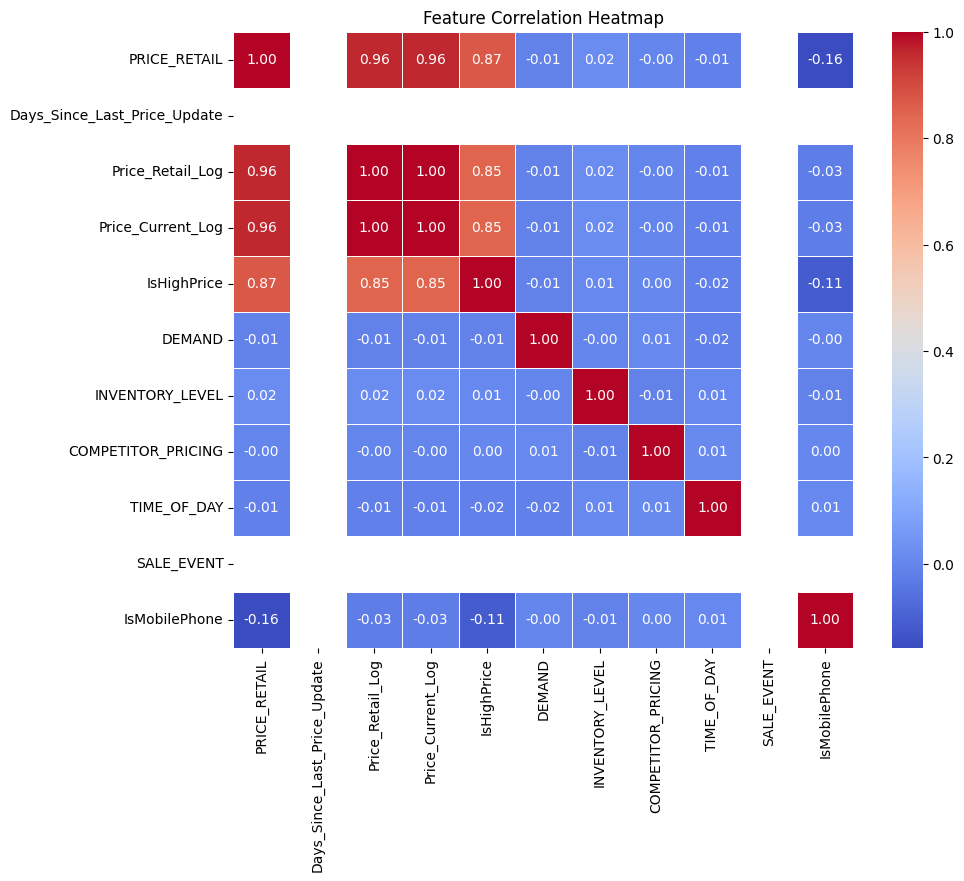

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()